# Visualizing The Gender Gap In College Degrees
### 1. Introduction:

In this guided project, we'll extend the work with plots that we started in the last project: **"Visualizing Earnings Based On College Majors"**. So far, we mostly focused on the STEM degrees in `Dataquest` course. The STEM fields stands for science, technology, engineering, and mathematics. The goal of this project is to create plots that are more viewer-friendly. Because we will go forward into the final version of these plots (creating a good visual aspect is the main goal here), the data analysis will be covered to a lesser extent. Some points will be revealed in the final conclusion.  

Now, we have knowledge enough to generate line charts, to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file. 

#### Before we start:

- If we wanted to publish the data visualizations we create, we need to be mindful of colour blindness. Thankfully, there are colour palettes we can use that are friendly for people with colour blindness. One of them is called [Color Blind 10](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) and was released by Tableau, the company that makes the data visualization platform of the same name.

- Non-data ink includes any elements in the chart that don't directly display data points. This includes tick markers, tick labels, and legends. Data ink includes any elements that display and depending on the data points underlying the chart. In a line chart, data ink would primarily be the lines and in a scatter plot, the data ink would primarily be in the markers. As we increase the data-ink ratio, we decrease non-data ink that can help a viewer understand certain aspects of the plots. We need to be mindful of this trade-off as we work on tweaking the appearance of plots to tell a story because plots we create could end up telling the wrong story.

This principle was originally set forth by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a pioneer of the field of data visualization. Tufte's first book, The Visual Display of Quantitative Information, is considered a bible among information designers.


![SegmentLocal](data-ink.gif "Non-data ink")

“Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space.”

                                                                                                     Edward Tufte

--------------
We start by pasting the whole code that we created in our course earlier:

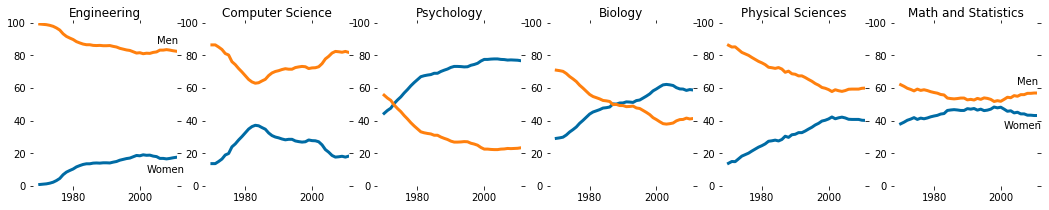

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering is large, while the gap in Biology, Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced.

### 2. Let's go deeper: comparing across all degrees:

Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other, in the following way:

>stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']

>lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']

>other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

While in the last mission, the `stem_cats` list was ordered by ending gender gap, all three of these lists are ordered in descending order by the percentage of degrees awarded to women. We have also noticed that while `stem_cats` and `other_cats` have six degree categories as elements, `lib_arts_cats` only has five. We'll need to not only modify the for loop to generate the STEM line charts that we wrote in the last mission but also add two new **for loops** to generate the line charts for *liberal* arts degrees and for *other degrees*.

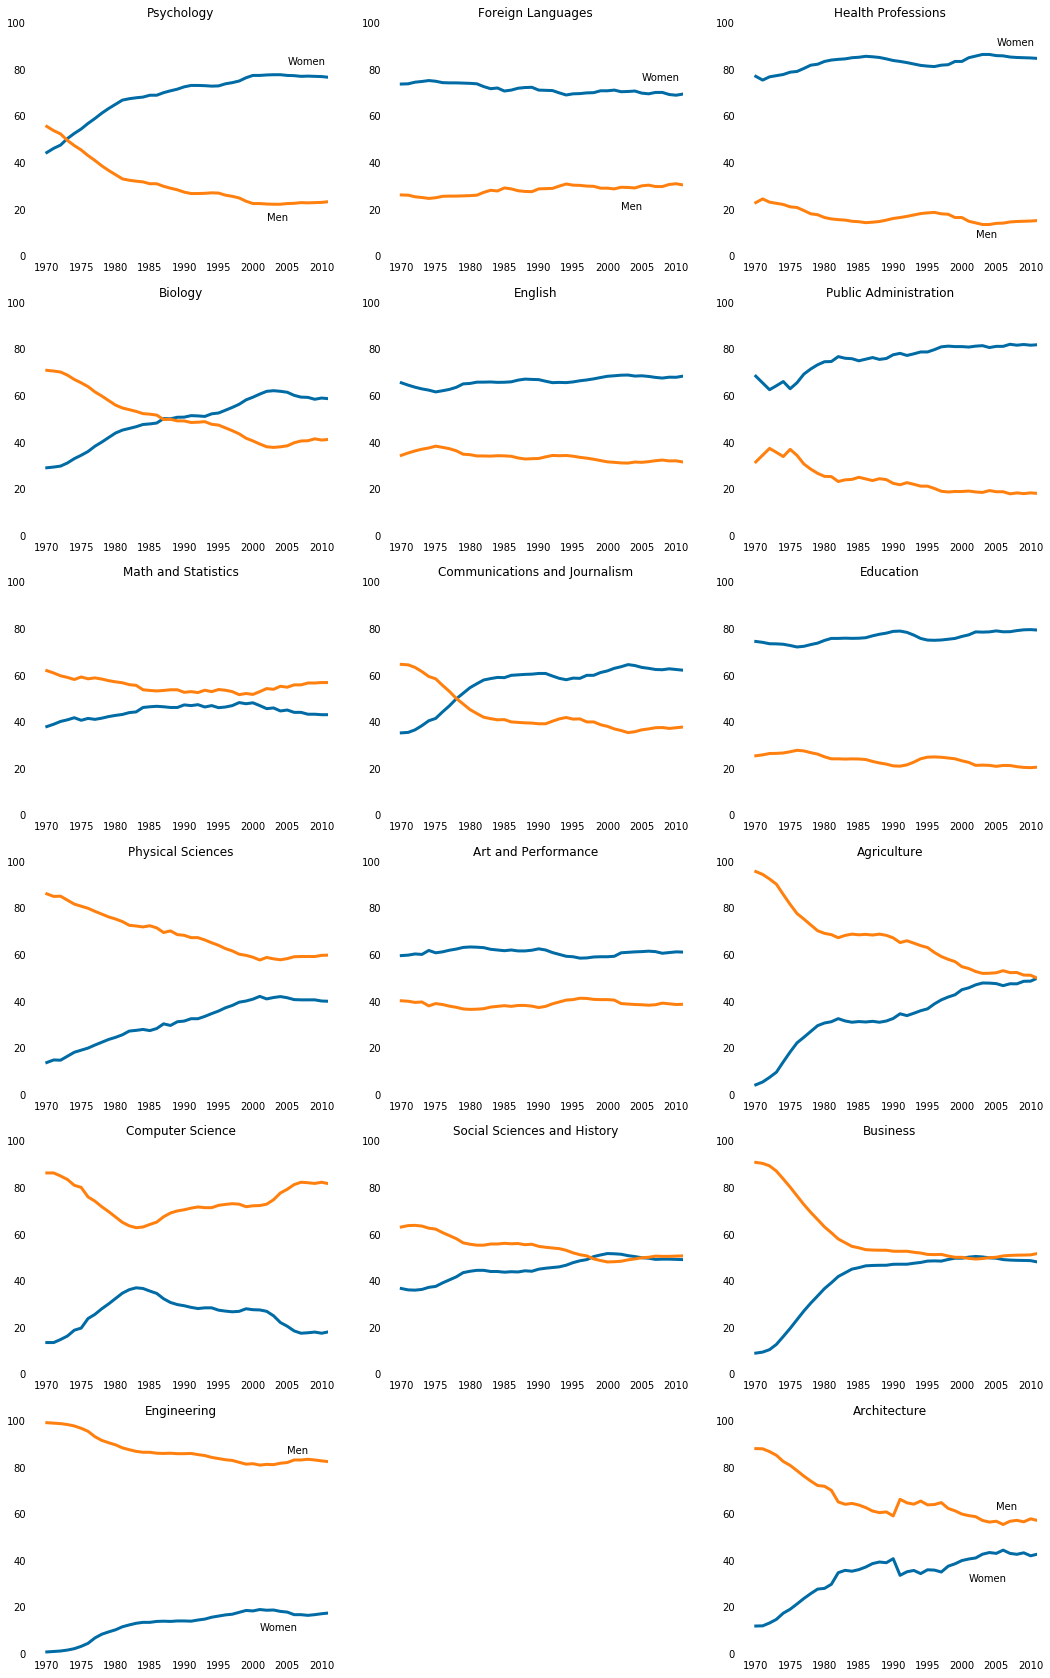

In [2]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Tests :

# # How many subplots will be?:
# major_list = stem_cats, lib_arts_cats, other_cats
# major_list_len = sum([ len(listElem) for listElem in major_list])
# major_list_len # test

# Creating subplots in the specific order test:

# for sp in range(0,6):
#     ax = (6,3,sp*3+3)
#     print(ax)

def chartjunk_out(ax_spines, y_ax_list):
    """
    Removing chartjunk and setting, fixed limits to all charts
    """
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(y_ax_list[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)


fig = plt.figure(figsize=(18, 30))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    
    # STEM categories for men and women from 1972 to 2012:
    ax.plot(
        women_degrees['Year'],women_degrees[stem_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[stem_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )
    chartjunk_out(ax.spines, stem_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 1st column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2002, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 86, 'Men')
        ax.text(2001, 10, 'Women')
            
# Adding subplots in the 2nd column of the 6*3 grid
# Range is smaller, because the list is shorter:
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    
    # Lib_arts categories for men and women from 1972 to 2012:    
    ax.plot(
        women_degrees['Year'], women_degrees[lib_arts_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )

    chartjunk_out(ax.spines, lib_arts_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 2nd column (to the topmost plot):
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2002, 20, 'Men')

            
# Adding subplots in the 3nd column of the 6*3 grid:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # 'Other' categories for men and women from 1972 to 2012:   
    ax.plot(
        women_degrees['Year'], women_degrees[other_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[other_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    ) 

    chartjunk_out(ax.spines, other_cats) # Removing chartjunk 

# Adding legend directly into line charts, 3rd column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 90, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 31, 'Women')
        
plt.show()

### 3. Hiding x-axis labels:

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it. If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one. We can accomplish this by modifying the call to `Axes.tick_params()` and setting `labelbottom` to `off`:

>ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')

This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:

>ax.tick_params(labelbottom='on')

We will:
- Disable the x-axis labels for all line charts except the bottommost line charts in each column.

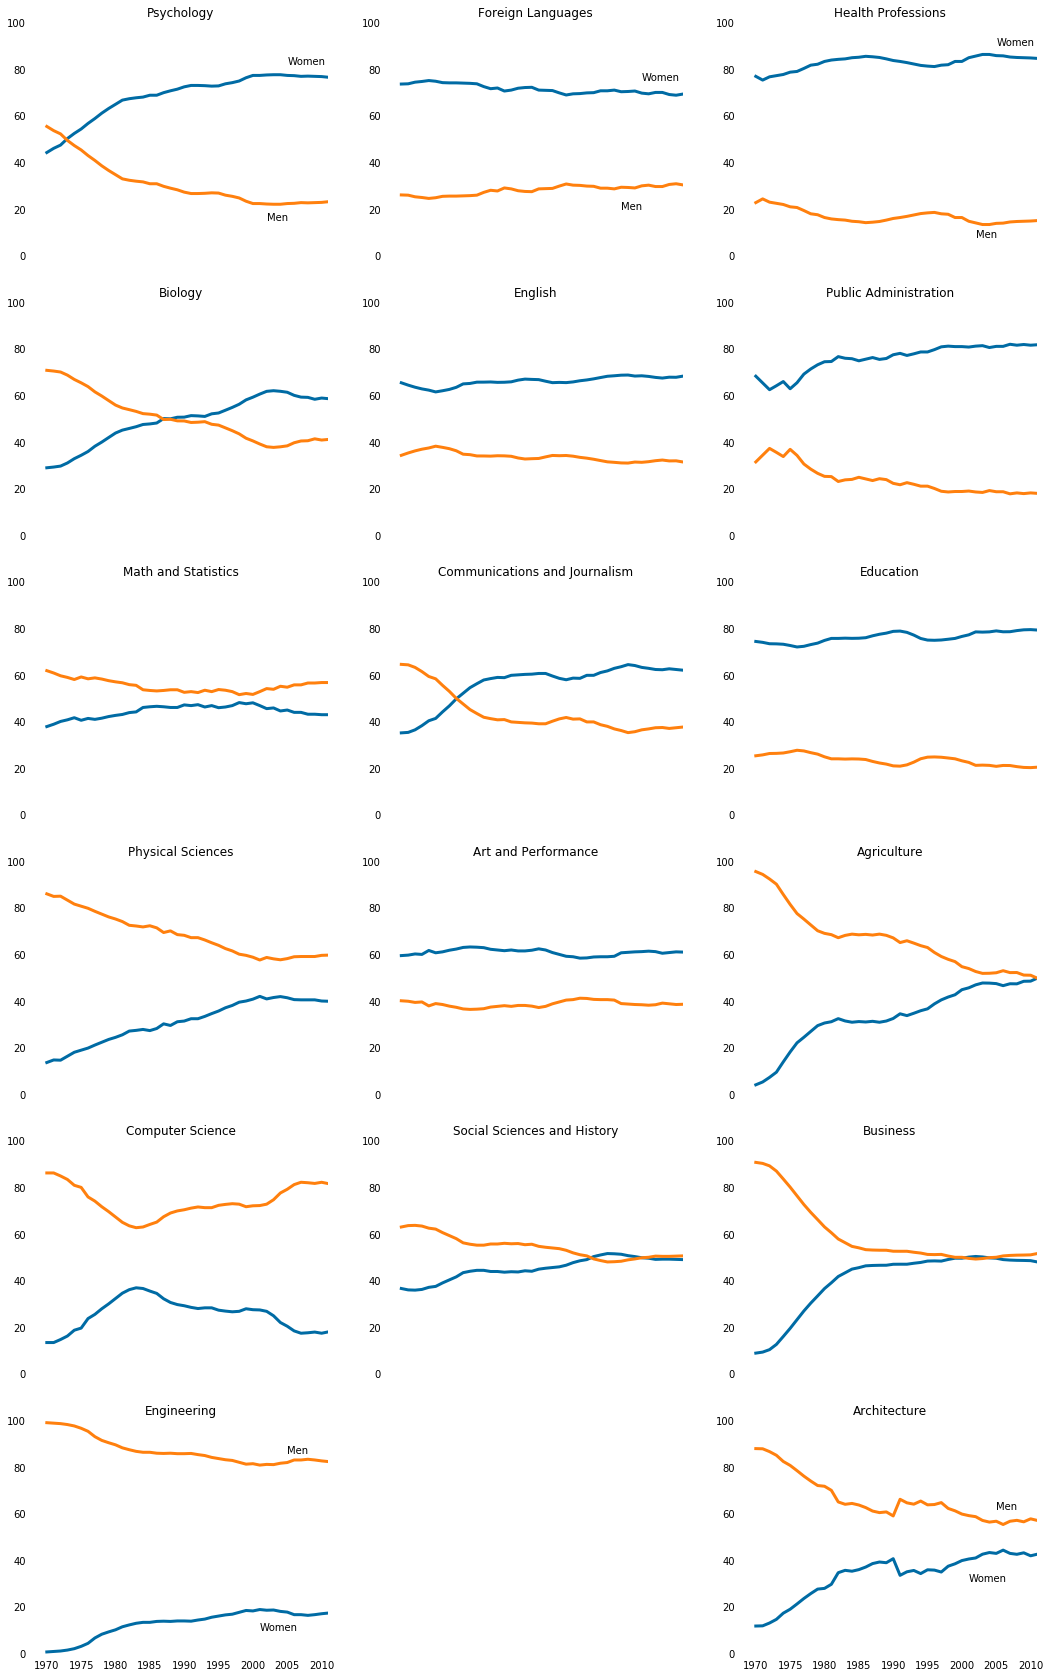

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Tests :

# # How many subplots will be?:
# major_list = stem_cats, lib_arts_cats, other_cats
# major_list_len = sum([ len(listElem) for listElem in major_list])
# major_list_len # test

# Creating subplots in the specific order test:

# for sp in range(0,6):
#     ax = (6,3,sp*3+3)
#     print(ax)

def chartjunk_out_no_years(y_ax_list):
    """
    Removing chartjunk and setting, fixed limits to all charts
    """
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(y_ax_list[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)

    
fig = plt.figure(figsize=(18, 30))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    
    # STEM categories for men and women from 1972 to 2012:
    ax.plot(
        women_degrees['Year'],women_degrees[stem_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[stem_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )
    chartjunk_out_no_years(stem_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 1st column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2002, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 86, 'Men')
        ax.text(2001, 10, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
# Adding subplots in the 2nd column of the 6*3 grid
# Range is smaller, because the list is shorter:
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    
    # Lib_arts categories for men and women from 1972 to 2012:    
    ax.plot(
        women_degrees['Year'], women_degrees[lib_arts_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )

    chartjunk_out_no_years(lib_arts_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 2nd column (to the topmost plot):
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2002, 20, 'Men')
            
# Adding subplots in the 3nd column of the 6*3 grid:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # 'Other' categories for men and women from 1972 to 2012:   
    ax.plot(
        women_degrees['Year'], women_degrees[other_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[other_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    ) 

    chartjunk_out_no_years(other_cats) # Removing chartjunk 

# Adding legend directly into line charts, 3rd column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 90, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 31, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
plt.show()

### 4. Setting y-axis labels:

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

In the vein of reducing cluttering, let's also simplify the y-axis labels. Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (`0` and `100`), we can keep some of the benefits of having the y-axis labels to begin with.

We can use the `Axes.set_yticks()` method to specify which labels we want displayed. The following code enables just the `0` and `100` labels to be displayed:

>ax.set_yticks([0,100])

We will:

- Enable just the y-axis labels at 0 and 100 (for all plots).

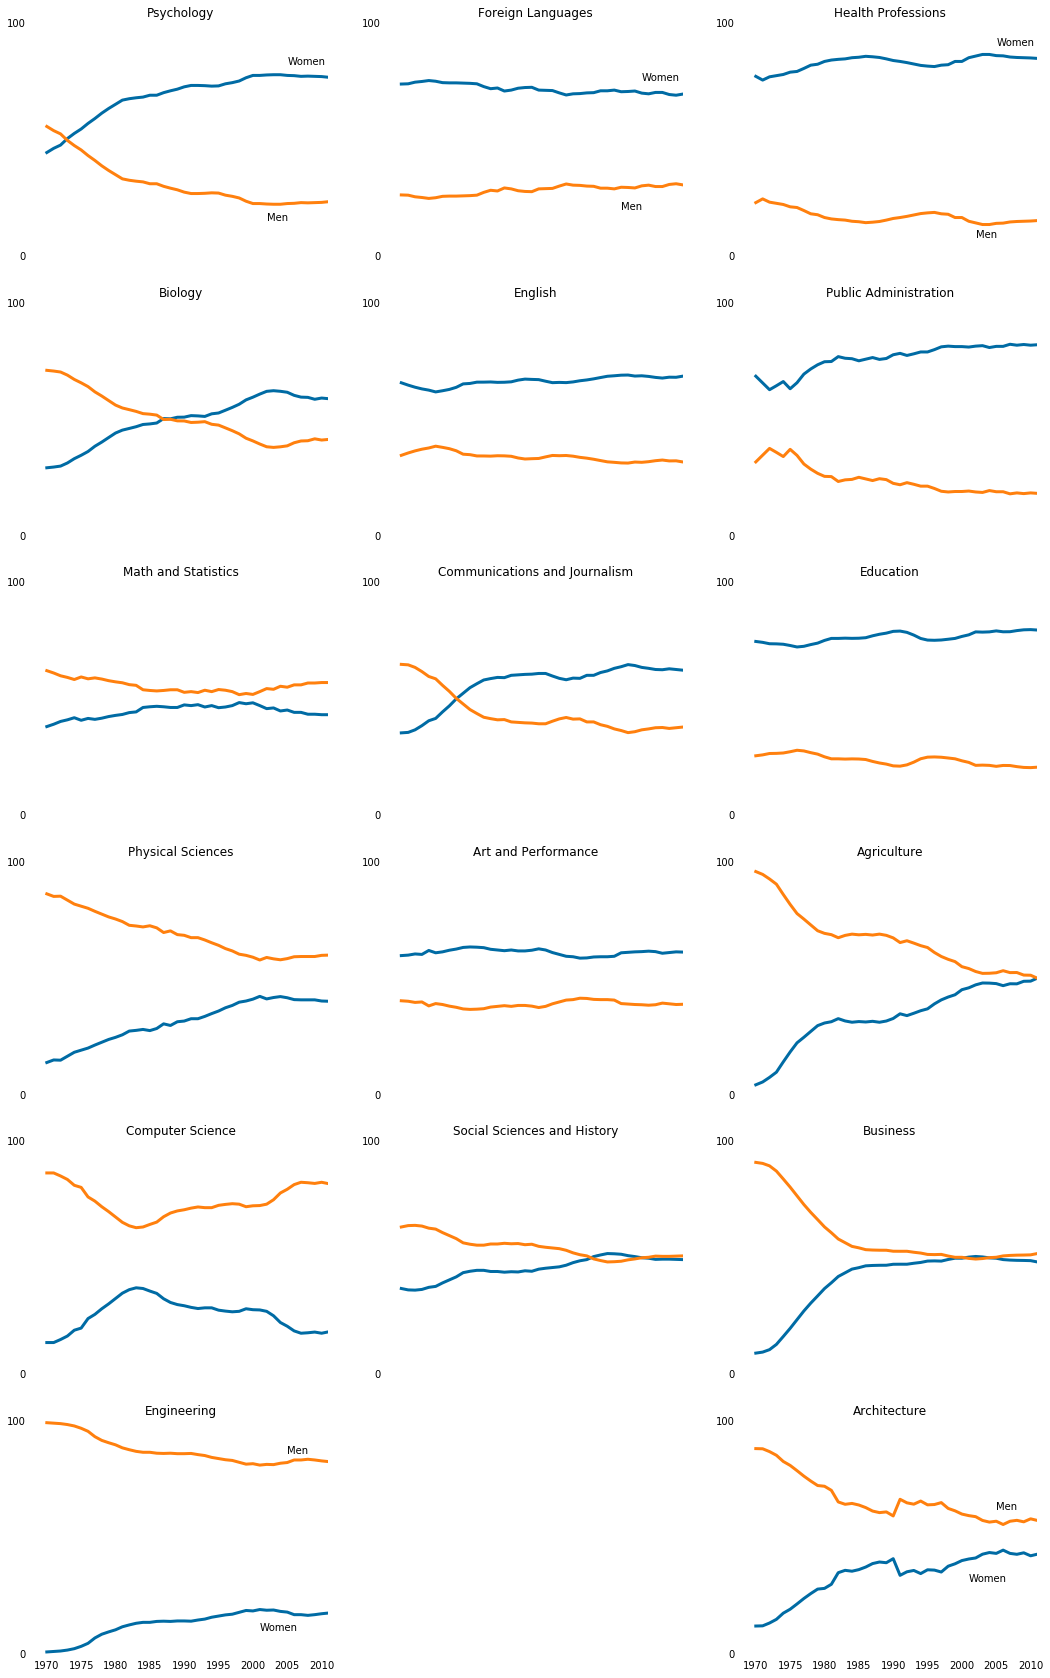

In [4]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Tests :

# # How many subplots will be?:
# major_list = stem_cats, lib_arts_cats, other_cats
# major_list_len = sum([ len(listElem) for listElem in major_list])
# major_list_len # test

# Creating subplots in the specific order test:

# for sp in range(0,6):
#     ax = (6,3,sp*3+3)
#     print(ax)

def chartjunk_out_no_years(y_ax_list):
    """
    Removing chartjunk and setting, fixed limits to all charts
    """
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(y_ax_list[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    
fig = plt.figure(figsize=(18, 30))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    
    # STEM categories for men and women from 1972 to 2012:
    ax.plot(
        women_degrees['Year'],women_degrees[stem_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[stem_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )
    chartjunk_out_no_years(stem_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 1st column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2002, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 86, 'Men')
        ax.text(2001, 10, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
# Adding subplots in the 2nd column of the 6*3 grid
# Range is smaller, because the list is shorter:
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    
    # Lib_arts categories for men and women from 1972 to 2012:    
    ax.plot(
        women_degrees['Year'], women_degrees[lib_arts_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )

    chartjunk_out_no_years(lib_arts_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 2nd column (to the topmost and plot):
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2002, 20, 'Men')
            
# Adding subplots in the 3nd column of the 6*3 grid:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # 'Other' categories for men and women from 1972 to 2012:   
    ax.plot(
        women_degrees['Year'], women_degrees[other_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[other_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    ) 

    chartjunk_out_no_years(other_cats) # Removing chartjunk 

# Adding legend directly into line charts, 3rd column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 90, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 31, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
plt.show()

### 5. Adding a horizontal line:

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label `50` would have been.

We can generate a horizontal line across an entire subplot using the `Axes.axhline()` method. The only required parameter is the y-axis location for the start of the line:

>ax.axhline(50)

Let's use the next color in the [Color Blind 10 palette](http://tableaufriction.blogspot.com/2012/11/finally-you-can-use-tableau-data-colors.html) for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the `c` parameter and the transparency using the `alpha` parameter. The value passed in to the `alpha` parameter must range between `0` and `1`.

We will generate a horizontal line with the following properties (for all plots):
- Starts at the y-axis position 50
- Set to the third color (light gray) in the Color Blind 10 palette
- Has a transparency of 0.3

Like so:

>ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

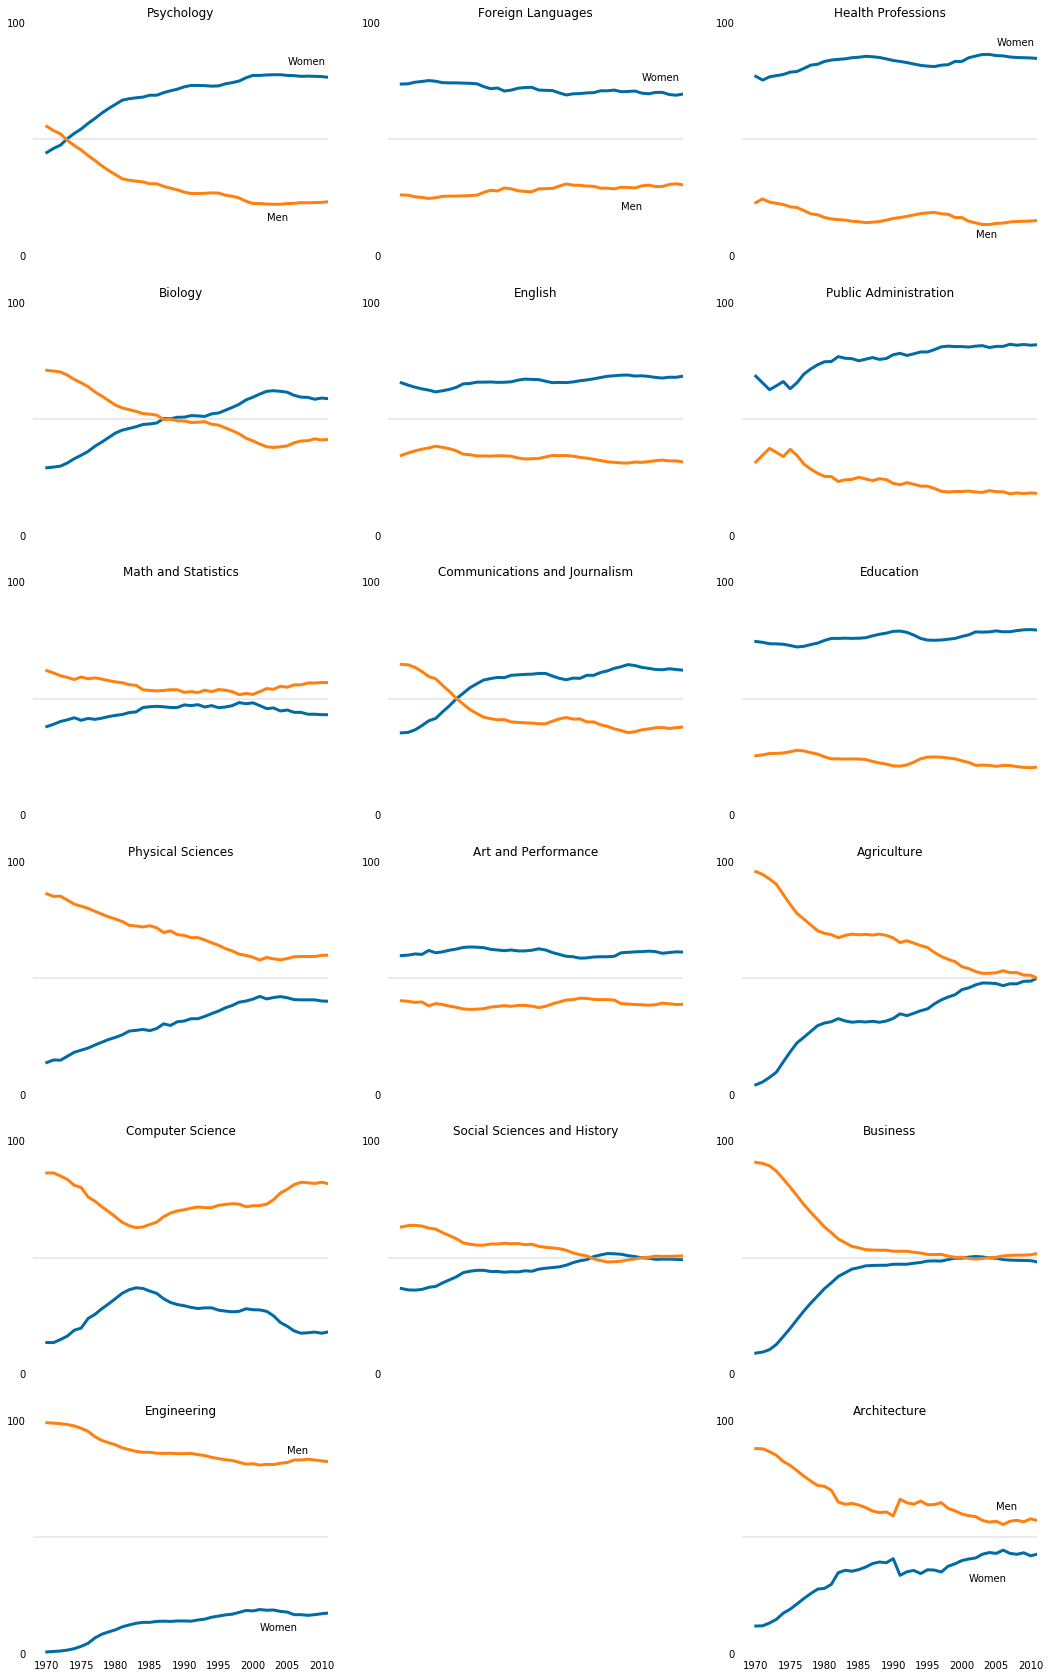

In [5]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Tests :

# # How many subplots will be?:
# major_list = stem_cats, lib_arts_cats, other_cats
# major_list_len = sum([ len(listElem) for listElem in major_list])
# major_list_len # test

# Creating subplots in the specific order test:

# for sp in range(0,6):
#     ax = (6,3,sp*3+3)
#     print(ax)

def chartjunk_out_no_years(y_ax_list):
    """
    Removing chartjunk and setting, fixed limits to all charts
    """
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(y_ax_list[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
fig = plt.figure(figsize=(18, 30))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    
    # STEM categories for men and women from 1972 to 2012:
    ax.plot(
        women_degrees['Year'],women_degrees[stem_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[stem_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )
    chartjunk_out_no_years(stem_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 1st column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2002, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 86, 'Men')
        ax.text(2001, 10, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
# Adding subplots in the 2nd column of the 6*3 grid
# Range is smaller, because the list is shorter:
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    
    # Lib_arts categories for men and women from 1972 to 2012:    
    ax.plot(
        women_degrees['Year'], women_degrees[lib_arts_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )

    chartjunk_out_no_years(lib_arts_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 2nd column (to the topmost plot):
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2002, 20, 'Men')
            
# Adding subplots in the 3nd column of the 6*3 grid:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # 'Other' categories for men and women from 1972 to 2012:   
    ax.plot(
        women_degrees['Year'], women_degrees[other_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[other_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    ) 

    chartjunk_out_no_years(other_cats) # Removing chartjunk 

# Adding legend directly into line charts, 3rd column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 90, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 31, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
plt.show()

### 6. Exporting to a file:

We can recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or `backends`. If we import matplotlib and run `matplotlib.get_backend()`, we'll see the specific backend you're currently using.

In [6]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

With the current backend we're using, we can use `Figure.savefig()` or `pyplot.savefig()` to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using pyplot.show().:

>plt.plot(women_degrees['Year'], women_degrees['Biology'])

>plt.savefig('biology_degrees.png')

In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images [here](https://www.sitepoint.com/gif-png-jpg-which-one-to-use/). The image will be exported into the same folder that our Jupyter Notebook server is running. We can click on the Jupyter logo to navigate the file system and find this image:

![SegmentLocal](jupyter_logo.png "segment")

Lastly, we will add a date to the file name. The date will update itself every time we will run the cell with code. We will do so because it helps us to know with ease: when the image was created. Because this project is updated from time to time and its files are exhibited on many platforms like `Data Quest` platform, `GitHub` platform etc. We will know if the image is recent or need to be updated: the name of the file will contain the date.  

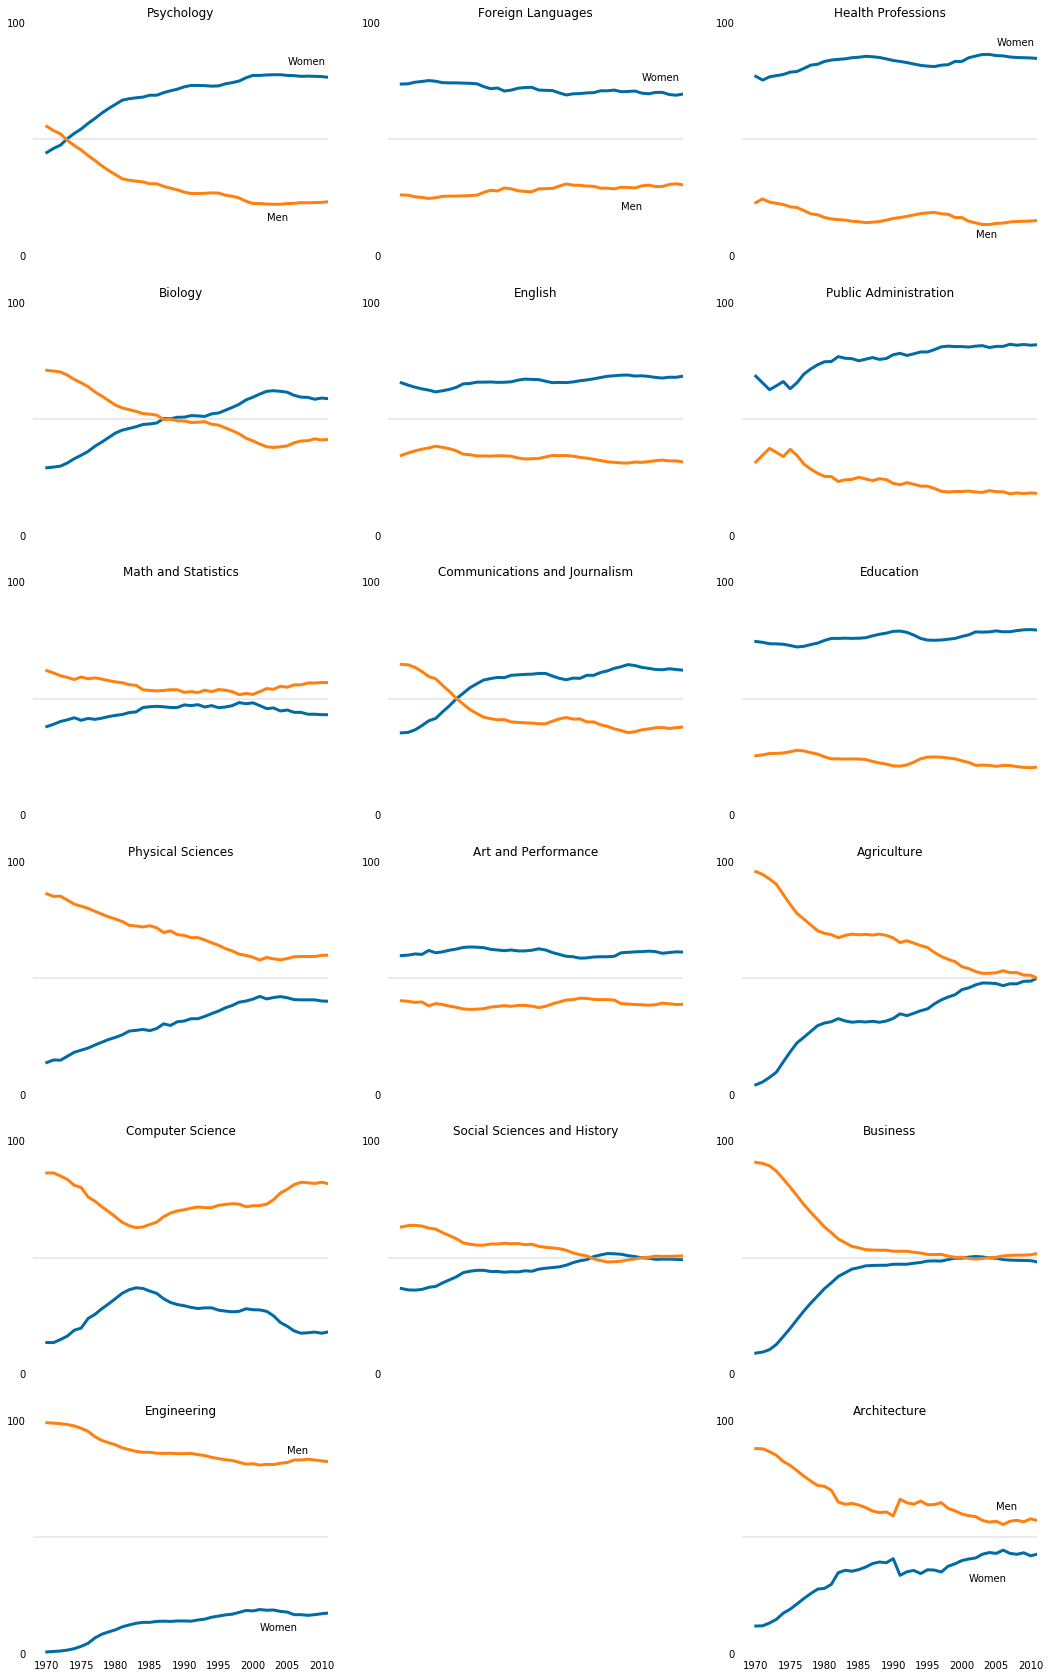

In [36]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Tests :

# # How many subplots will be?:
# major_list = stem_cats, lib_arts_cats, other_cats
# major_list_len = sum([ len(listElem) for listElem in major_list])
# major_list_len # test

# Creating subplots in the specific order test:

# for sp in range(0,6):
#     ax = (6,3,sp*3+3)
#     print(ax)

def chartjunk_out_no_years(y_ax_list):
    """
    Removing chartjunk and setting, fixed limits to all charts
    """
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(y_ax_list[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
fig = plt.figure(figsize=(18, 30))

# Creating a 6*3 grid of subplots and adding subplots in the 1st column:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+1)
    
    # STEM categories for men and women from 1972 to 2012:
    ax.plot(
        women_degrees['Year'],women_degrees[stem_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[stem_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )
    chartjunk_out_no_years(stem_cats) # Removing chartjunk
    
# Adding legen directly into line charts, 1st column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2002, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 86, 'Men')
        ax.text(2001, 10, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis
        
# Adding subplots in the 2nd column of the 6*3 grid
# Range is smaller, because the list is shorter:
for sp in range(0,5):
    ax = fig.add_subplot(6,3,sp*3+2)
    
    # Lib_arts categories for men and women from 1972 to 2012:    
    ax.plot(
        women_degrees['Year'], women_degrees[lib_arts_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    )

    chartjunk_out_no_years(lib_arts_cats) # Removing chartjunk
    
# Adding legend directly into line charts, 2nd column (to the topmost plot):
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2002, 20, 'Men')
            
# Adding subplots in the 3nd column of the 6*3 grid:
for sp in range(0,6):
    ax = fig.add_subplot(6,3,sp*3+3)
    
    # 'Other' categories for men and women from 1972 to 2012:   
    ax.plot(
        women_degrees['Year'], women_degrees[other_cats[sp]],
        c=cb_dark_blue, label='Women', linewidth=3
    )
    ax.plot(
        women_degrees['Year'], 100-women_degrees[other_cats[sp]],
        c=cb_orange, label='Men', linewidth=3
    ) 

    chartjunk_out_no_years(other_cats) # Removing chartjunk 

# Adding legend directly into line charts, 3rd column (to the topmost and bottommost plots):
    if sp == 0:
        ax.text(2005, 90, 'Women')
        ax.text(2002, 8, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 31, 'Women')
        ax.tick_params(labelbottom=True) # add years on x-axis

# Module needed for a date that is included with the file name generated at the end of this cell
from datetime import datetime

today_date = datetime.now().strftime("%d-%m-%Y Time %I_%M_%S_%p")
        
        
# Creating a string with today's date:
file_name = 'gender_degrees - ' + today_date

# file_name # test


# Exporting to a file, format: .png
plt.savefig(file_name + '.png')        

plt.show()


-----------------------
### 7. The general conclusion:

The line graph shows that the number of male students vs. female students develops in a mirror-like manner in each study program. Depending on the field of study, the relationship between the sexes either tends to the "mean values" where both groups constitute the same population or opposite. 

From all majors `Social Science and History` and `Busines` are interesting examples where the gender gap fade. We can conclude thou, that those two majors are the most popular in each gender. 